In [2]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.selection.tournament import TournamentSelection
from pymoo.optimize import minimize
from pymoo.problems import get_problem

import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
import itertools

In [3]:
def lexicographic_tournament(pop, P, threshold, priority, **kwargs):
    n_tournaments, n_competitors = P.shape
    if priority == 1:
        objective_1_index = 0
        objective_2_index = 1
    elif priority == 2:
        objective_1_index = 1
        objective_2_index = 0
    else:
        print('ERROR')

    if n_competitors != 2:
        raise Exception("Only pressure=2 allowed for lexicographic tournament!")

    S = np.full(n_tournaments, -1, dtype=int)

    for i in range(n_tournaments):
        x, y = P[i]

        a_x = pop[x].F[objective_1_index]
        a_y = pop[y].F[objective_1_index]
        t_a = threshold[objective_1_index]

        if abs(a_x - a_y) > t_a:
            S[i] = x if a_x < a_y else y

        else:
            b_x = pop[x].F[objective_2_index]
            b_y = pop[y].F[objective_2_index]
            t_b = threshold[objective_2_index]

            if abs(b_x - b_y) < t_b:
                S[i] = x if b_x < b_y else y

            else:
                S[i] = x if a_x < a_y else y
    return S

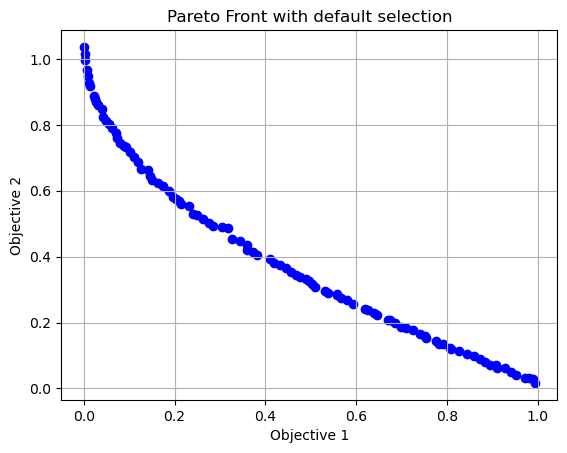

Starting combination: 1


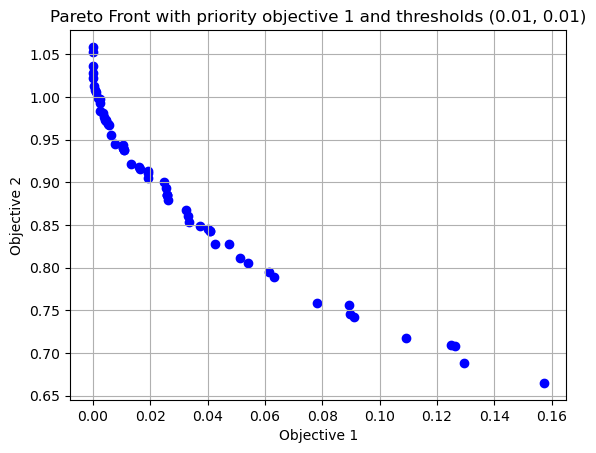

Finishing combination: 1
Starting combination: 2


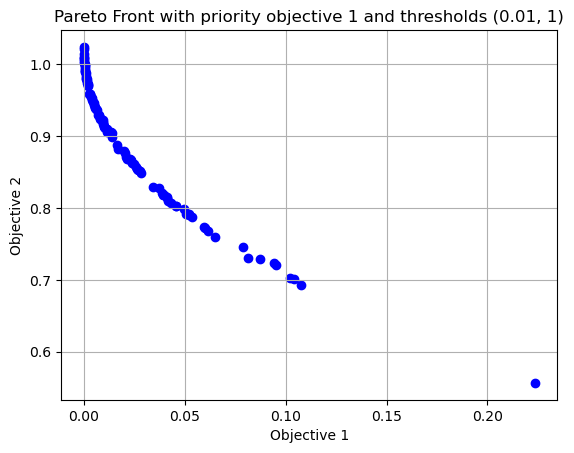

Finishing combination: 2
Starting combination: 3


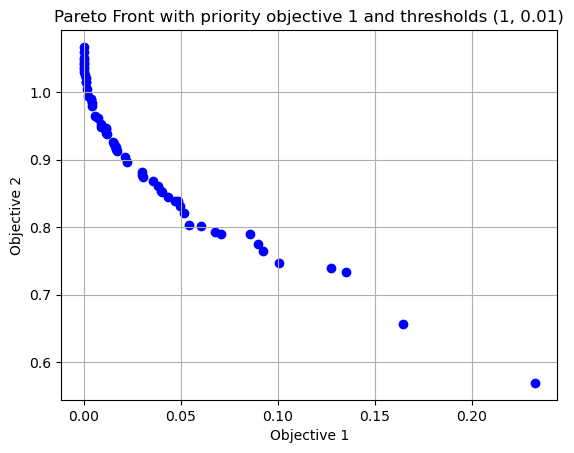

Finishing combination: 3
Starting combination: 4


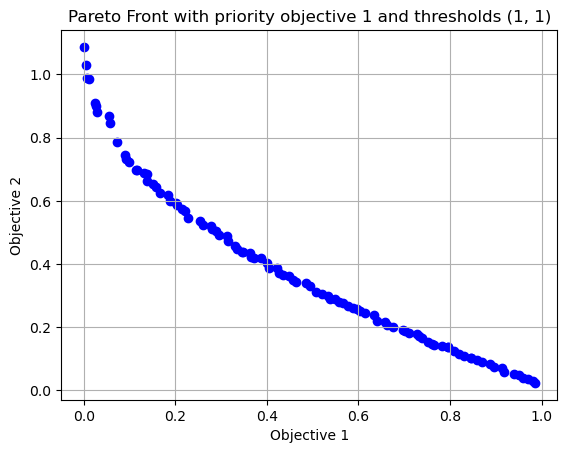

Finishing combination: 4
Starting combination: 5


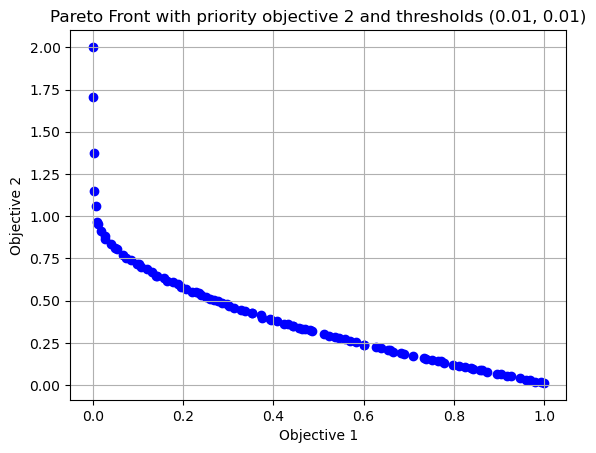

Finishing combination: 5
Starting combination: 6


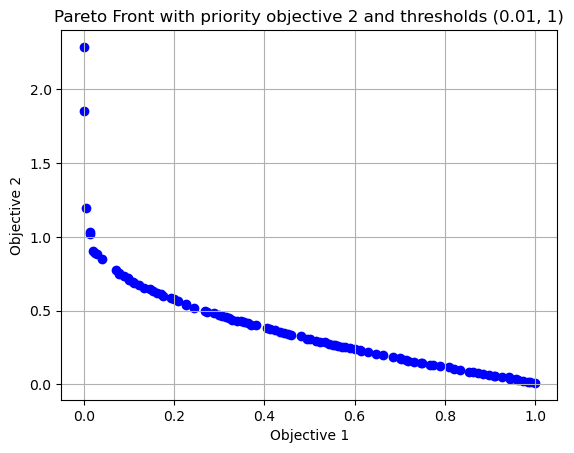

Finishing combination: 6
Starting combination: 7


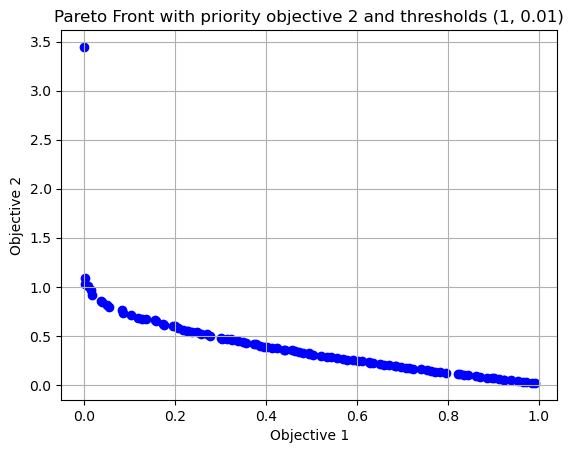

Finishing combination: 7
Starting combination: 8


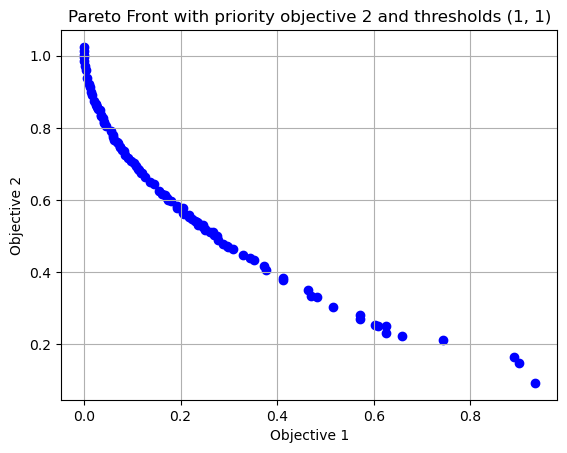

Finishing combination: 8


In [4]:
path = Path(Path.cwd())
file_path = path / 'dataset' / 'adult_income.data'

#default selection
population_size = 100
number_generations = 100

problem = get_problem("zdt1")
algorithm = NSGA2(pop_size=population_size, eliminate_duplicates=True)

res = minimize(problem,
            algorithm,
            ('n_gen', number_generations),
            seed=1,
            verbose=False)

plt.figure()
plt.scatter(res.F[:, 0], res.F[:, 1], c='blue', marker='o')
plt.title('Pareto Front with default selection')
plt.xlabel('Objective 1')
plt.ylabel('Objective 2')
plt.grid(True)
file_out = path / 'images' / 'lexicographic_tournament' / 'default_selection.png'
plt.savefig(file_out, dpi=300)
plt.show()

#testes para as duas prioridades com diferentes thresholds
priority = [1,2]
threshold = [1e-2, 1]
threshold_vector = list(itertools.product(threshold, threshold))

complete_combinations = list(itertools.product(priority, threshold_vector))

start = 0 #state
for index in range(start, len(complete_combinations)):
    print (f'Starting combination: {index+1}')

    combination = complete_combinations[index]
    priority = combination[0]
    threshold = combination[1]
    
    name = f'{priority}_{threshold}'
    title = f'Pareto Front with priority objective {priority} and thresholds {threshold}'

    selection = TournamentSelection(pressure=2, func_comp=lambda pop, P, **kwargs: lexicographic_tournament(pop, P, threshold, priority, **kwargs))
    problem = get_problem("zdt1")
    algorithm = NSGA2(pop_size=population_size, eliminate_duplicates=True, selection=selection)
    
    res = minimize(problem,
                algorithm,
                ('n_gen', number_generations),
                seed=1,
                verbose=False)

    plt.figure()
    plt.scatter(res.F[:, 0], res.F[:, 1], c='blue', marker='o')
    plt.title(title)
    plt.xlabel('Objective 1')
    plt.ylabel('Objective 2')
    plt.grid(True)
    file_out = path / 'images' / 'lexicographic_tournament' / f'{name}.png'
    plt.savefig(file_out, dpi=300)
    plt.show()
    print (f'Finishing combination: {index+1}')
